# **Credit Card Fraud Detection**
## **Project Overview:**
In this project, I am working on detecting fraudulent transactions in credit card data using four different machine learning models: Logistic Regression, DecisionTreeClassifier, SVC, and RandomForestClassifier. The dataset contains transaction details, including time, various anonymized features (V1 to V28), the transaction amount, and a class label indicating whether the transaction is fraudulent or not.

**Dataset Overview:** The dataset used for this project consists of credit card transactions, where each row represents a transaction and the features include various numerical variables derived from the original transaction data. The dataset contains 31 columns, including:

**Time:** The time elapsed between this transaction and the first transaction in the dataset.

**V1 to V28:** The principal components obtained from a PCA transformation applied to the original features to protect confidentiality.

**Amount:** The transaction amount.

**Class:** The label indicating whether the transaction is fraudulent (1) or not (0).

This dataset is highly imbalanced, with a small percentage of transactions being fraudulent. Therefore, careful handling of the data and model selection is crucial for accurate detection

## **Import Relevant Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## **Load Datasets**

In [3]:
raw_data= pd.read_csv("creditcard.csv")
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df= raw_data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## **Data Cleaning and Data preprocessing**



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25838.000000,25838.000000,25838.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19376.128532,-0.225653,0.166976,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.899424,1.889055,1.552796,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.750000,-0.951266,-0.405158,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22684.000000,-0.267973,0.176509,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30231.500000,1.166499,0.818206,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [8]:
robust_scaler = RobustScaler()

df['Amount']= robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']=robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))


In [9]:
df['Amount'].head()

,Amount
0,2.122827
1,-0.264338
2,5.844029
3,1.698457
4,0.829082


In [10]:
df['Time'].head()

,Time
0,-1.006534
1,-1.006534
2,-1.006489
3,-1.006489
4,-1.006445


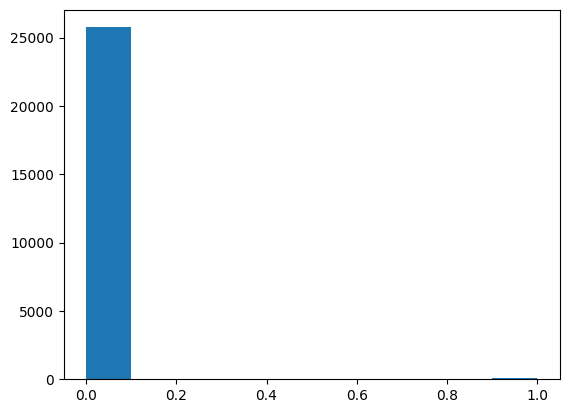

In [11]:
plt.hist(df['Class'])
plt.show()

In [12]:
len(df['Class'])

25838

In [13]:
count_0= 0
count_1=0
for i in df['Class']:
  if i==0:
    count_0+=1
  else:
    count_1+=1
print(count_0,count_1)

25749 89


In [14]:
df['Class'].isnull().sum()

1

In [15]:
df["Class"].fillna(0,inplace=True)

In [16]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target variable

## **Under Sampling Class distribution**

In [17]:
randomundersampler = RandomUnderSampler(random_state=42)
x_u_res,y_u_res= randomundersampler.fit_resample(X,y)

In [18]:
# Convert the resampled features and target back to a DataFrame
df_u_res = pd.DataFrame(x_u_res, columns=X.columns)
df_u_res['Class'] = y_u_res

In [19]:
df_u_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12479,-0.036163,1.114675,-1.024062,1.366630,-0.319079,-1.789283,-0.425046,-1.226279,-0.095098,1.040149,...,0.364599,0.999181,-0.183752,0.397448,0.258570,-0.096088,0.010002,0.049376,1.900894,0.0
8295,-0.514892,1.372983,-0.382354,0.064602,-0.677002,-0.398106,0.039571,-0.896465,-0.051860,0.388561,...,0.114647,0.482646,-0.290577,-0.918547,0.596859,-0.073305,0.003622,0.020262,0.325589,0.0
22809,0.432982,1.207998,-0.952035,0.626768,-0.631326,-1.270338,-0.112954,-0.900152,0.117979,-0.354341,...,-0.444645,-0.992975,0.141369,-0.305043,-0.179416,0.907325,-0.034352,0.023807,0.940536,0.0
12628,-0.024671,0.207277,-1.832827,0.761424,0.771912,-1.166761,1.108127,-0.435695,0.319084,2.181551,...,-0.008840,-0.538031,-0.250298,-0.269627,-0.244948,0.867797,-0.117473,0.069039,7.147360,0.0
12151,-0.067401,1.202153,-0.022347,0.793036,-0.654074,-0.725242,-0.864207,-0.294163,-0.199199,2.453744,...,-0.210849,-0.192181,0.109706,0.343280,0.317280,-0.908322,0.064652,0.030198,-0.148010,0.0


In [20]:
print("Original dataset class distribution:")
print(y.value_counts())

print("\nUnder Resampled dataset class distribution:")
print(y_u_res.value_counts())

Original dataset class distribution:
Class
0.0    25750
1.0       88
Name: count, dtype: int64

Under Resampled dataset class distribution:
Class
0.0    88
1.0    88
Name: count, dtype: int64


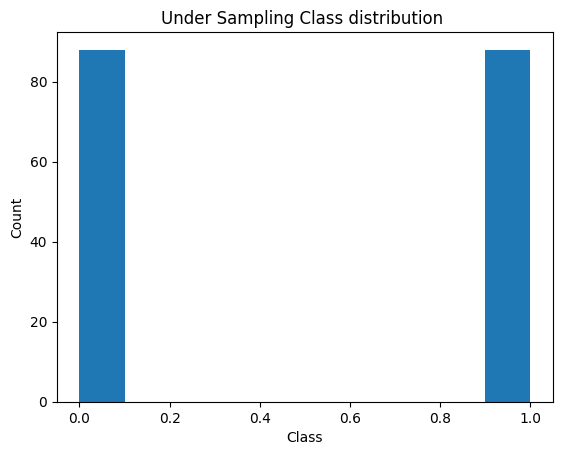

In [21]:
plt.hist(y_u_res)
plt.title("Under Sampling Class distribution ")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [22]:
random_shuffle  = df.sample(frac=1)

## **Correlation**

In [23]:
org_correl = df.corr()

under_correl = df_u_res.corr()

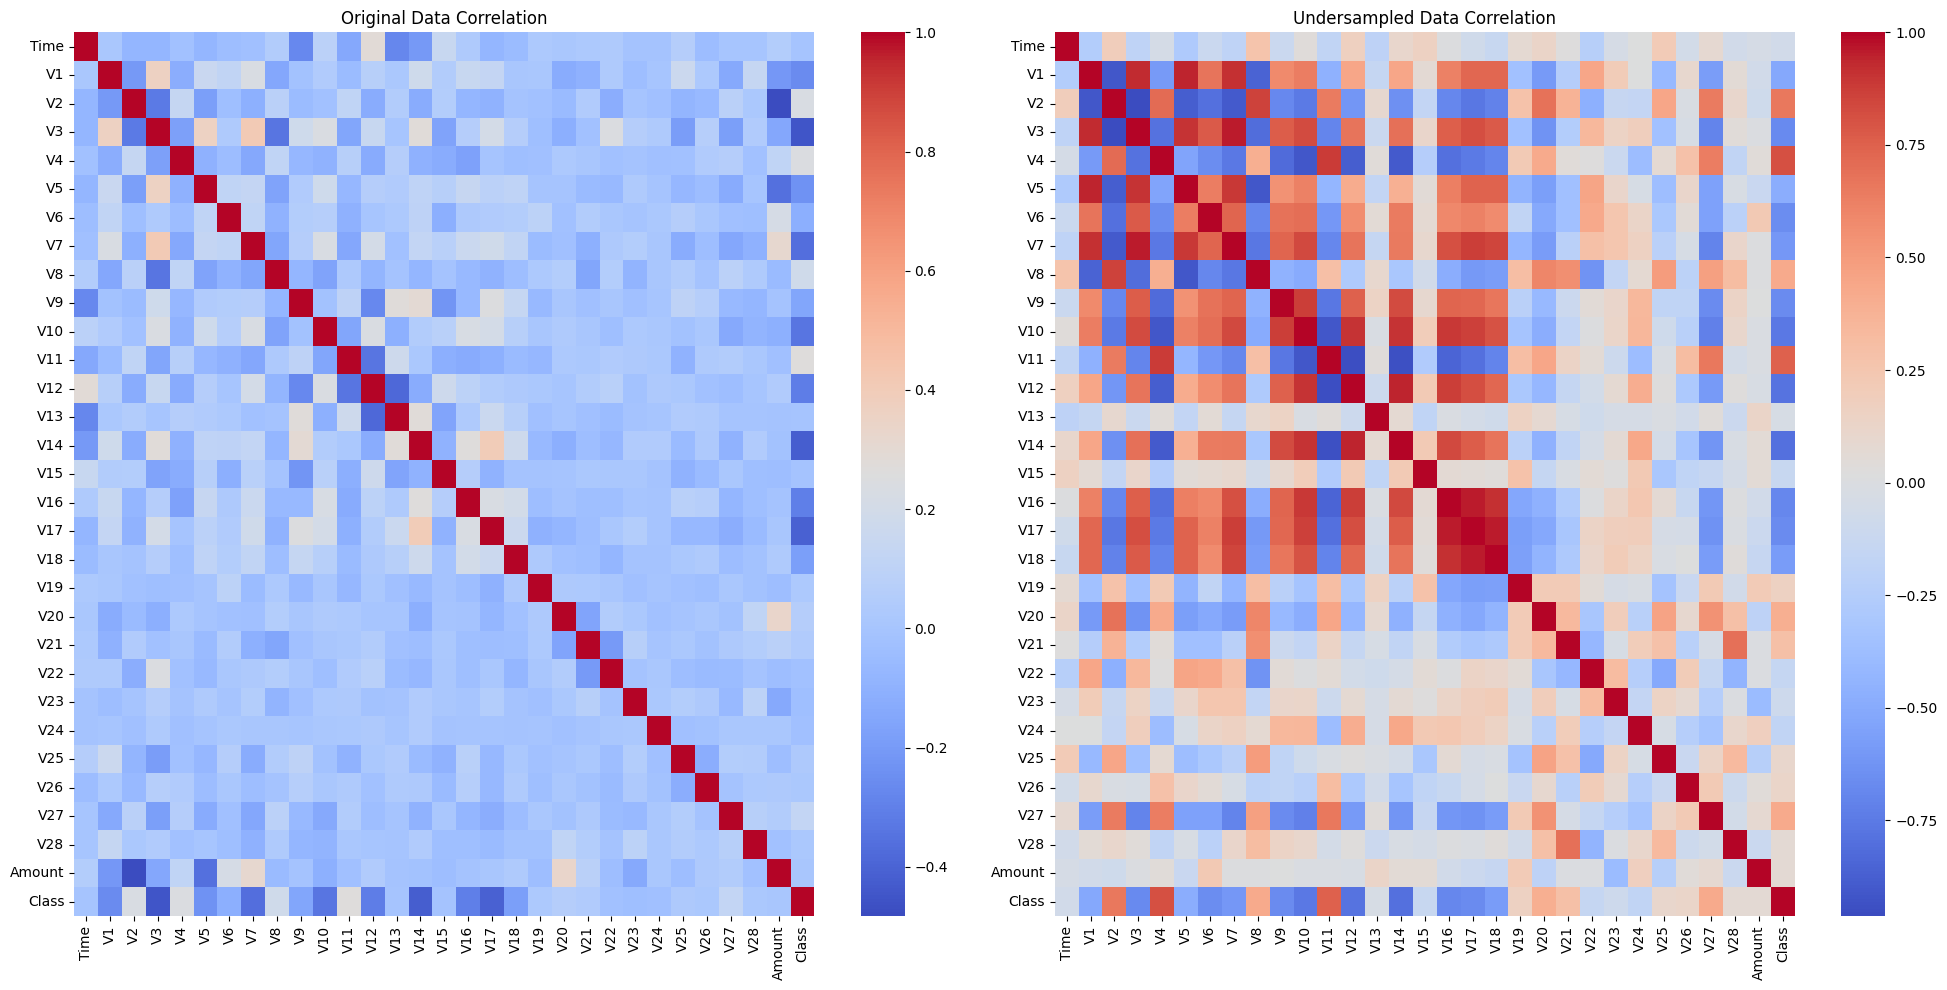

In [24]:
# Assuming org_correl and under_correl are your correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap for original correlation matrix
sns.heatmap(org_correl, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Original Data Correlation')

# Heatmap for undersampled correlation matrix
sns.heatmap(under_correl, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Undersampled Data Correlation')

plt.tight_layout()
plt.show()


## **In UnderSample Data Crrelation**

## Notably, variables **V3, V10, V12, and V14** exhibit strong negative correlations with the target class.

## On the other hand, variables **V2, V4, and V11** show a positive correlation with the target class. In these cases

Text(0.5, 1.0, 'V14')

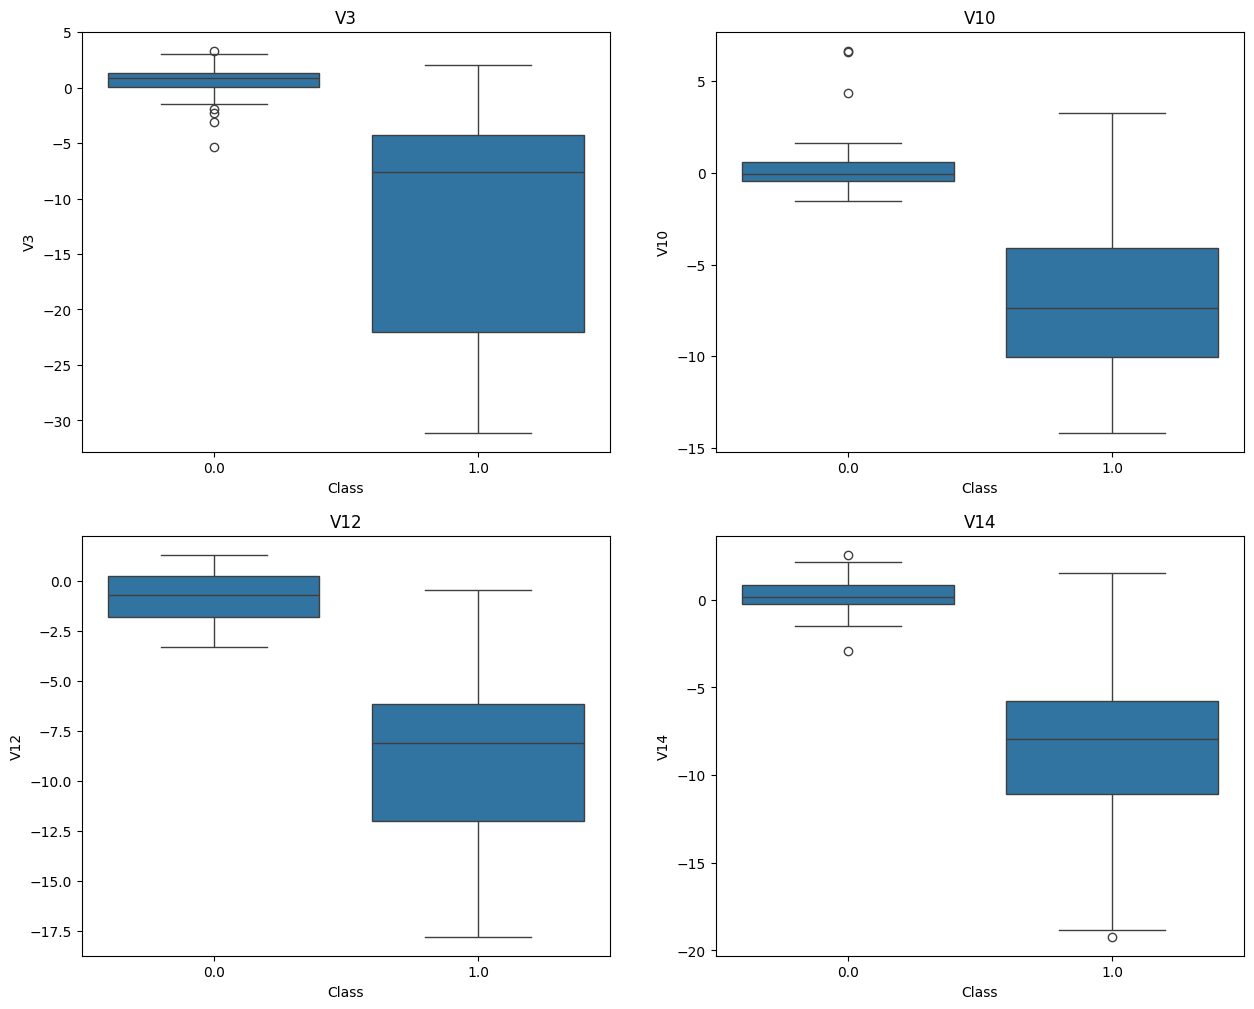

In [25]:
fig, ax = plt.subplots(2,2,figsize=(15,12))

sns.boxplot(x="Class", y="V3",data=df_u_res,ax=ax[0][0])
ax[0][0].set_title("V3")

sns.boxplot(x="Class",y="V10",data=df_u_res,ax=ax[0][1])
ax[0][1].set_title("V10")

sns.boxplot(x="Class",y='V12',data=df_u_res,ax=ax[1][0])
ax[1][0].set_title("V12")

sns.boxplot(x="Class",y="V14",data=df_u_res,ax=ax[1][1])
ax[1][1].set_title("V14")


## **Remove Outlier**

In [26]:
df_u_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12479,-0.036163,1.114675,-1.024062,1.366630,-0.319079,-1.789283,-0.425046,-1.226279,-0.095098,1.040149,...,0.364599,0.999181,-0.183752,0.397448,0.258570,-0.096088,0.010002,0.049376,1.900894,0.0
8295,-0.514892,1.372983,-0.382354,0.064602,-0.677002,-0.398106,0.039571,-0.896465,-0.051860,0.388561,...,0.114647,0.482646,-0.290577,-0.918547,0.596859,-0.073305,0.003622,0.020262,0.325589,0.0
22809,0.432982,1.207998,-0.952035,0.626768,-0.631326,-1.270338,-0.112954,-0.900152,0.117979,-0.354341,...,-0.444645,-0.992975,0.141369,-0.305043,-0.179416,0.907325,-0.034352,0.023807,0.940536,0.0
12628,-0.024671,0.207277,-1.832827,0.761424,0.771912,-1.166761,1.108127,-0.435695,0.319084,2.181551,...,-0.008840,-0.538031,-0.250298,-0.269627,-0.244948,0.867797,-0.117473,0.069039,7.147360,0.0
12151,-0.067401,1.202153,-0.022347,0.793036,-0.654074,-0.725242,-0.864207,-0.294163,-0.199199,2.453744,...,-0.210849,-0.192181,0.109706,0.343280,0.317280,-0.908322,0.064652,0.030198,-0.148010,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18773,0.313665,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,-0.296994,1.0
18809,0.315085,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,0.184240,1.0
20198,0.362430,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,1.394801,1.0
23308,0.443808,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,-0.308042,1.0


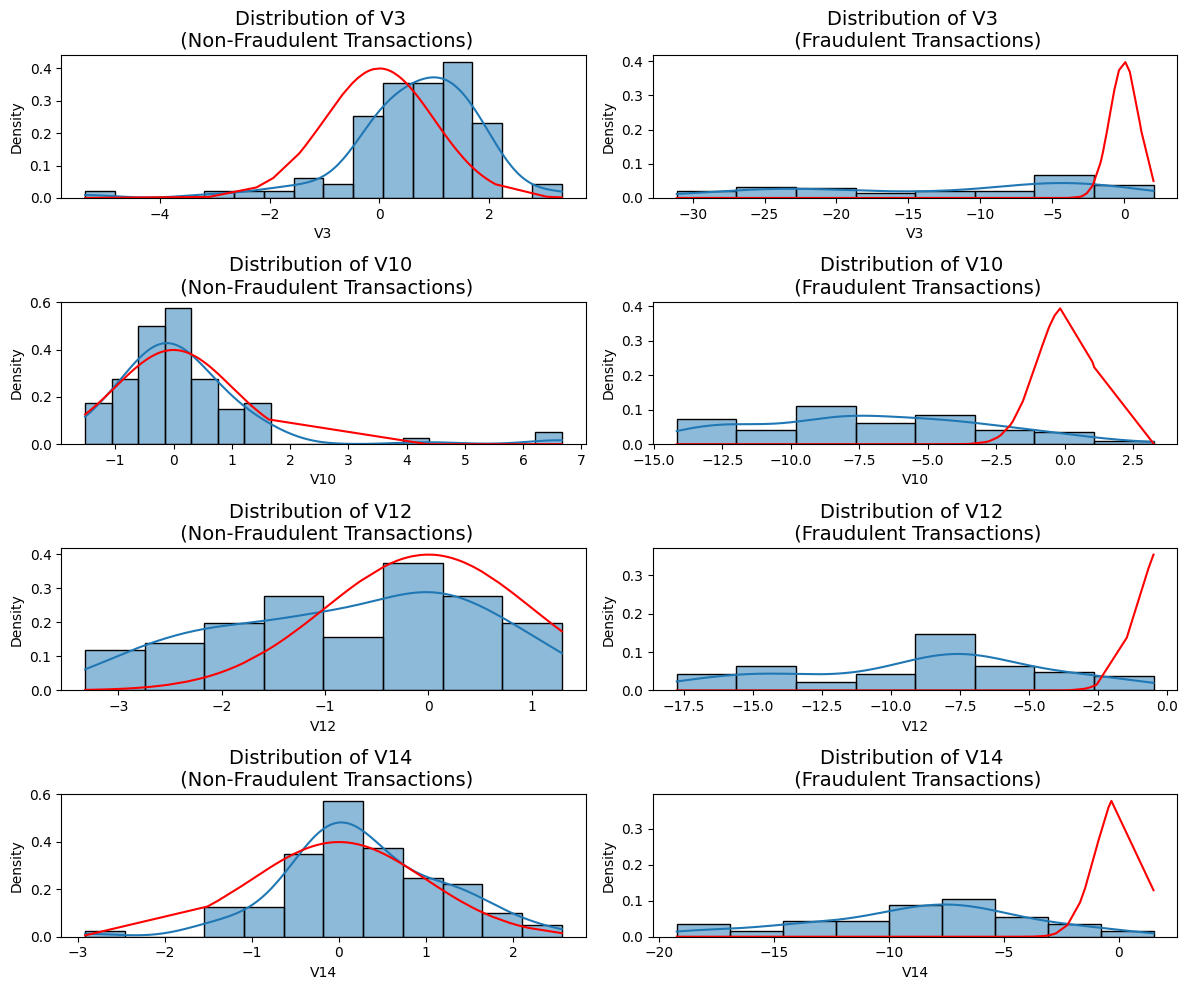

In [27]:
fig, ax = plt.subplots(4, 2, figsize=(12, 10))

# V3 plots

sns.histplot(df_u_res['V3'].loc[df_u_res['Class'].values == 0], kde=True, ax=ax[0][0], stat="density")
sns.lineplot(x=df_u_res['V3'].loc[df_u_res['Class'] == 0], y=norm.pdf(df_u_res['V3'].loc[df_u_res['Class'] == 0]), ax=ax[0][0], color='red')
ax[0][0].set_title('Distribution of V3 \n (Non-Fraudulent Transactions)', fontsize=14)

sns.histplot(df_u_res['V3'].loc[df_u_res['Class'] == 1], kde=True, ax=ax[0][1], stat="density")
sns.lineplot(x=df_u_res['V3'].loc[df_u_res['Class'] == 1], y=norm.pdf(df_u_res['V3'].loc[df_u_res['Class'] == 1]), ax=ax[0][1], color='red')
ax[0][1].set_title('Distribution of V3 \n (Fraudulent Transactions)', fontsize=14)


# V10 plots

sns.histplot(df_u_res['V10'].loc[df_u_res['Class'] == 0], kde=True, ax=ax[1][0], stat="density" )
sns.lineplot(x=df_u_res['V10'].loc[df_u_res['Class'] == 0], y=norm.pdf(df_u_res['V10'].loc[df_u_res['Class'] == 0]), ax=ax[1][0], color='red')
ax[1][0].set_title('Distribution of V10 \n (Non-Fraudulent Transactions)', fontsize=14)

sns.histplot(df_u_res['V10'].loc[df_u_res['Class'] == 1], kde=True, ax=ax[1][1], stat="density")
sns.lineplot(x=df_u_res['V10'].loc[df_u_res['Class'] == 1].values, y=norm.pdf(df_u_res['V10'].loc[df_u_res['Class'] == 1]), ax=ax[1][1], color='red')
ax[1][1].set_title('Distribution of V10 \n (Fraudulent Transactions)', fontsize=14)


# V12 plots

sns.histplot(df_u_res['V12'].loc[df_u_res['Class'] == 0], kde=True, ax=ax[2][0], stat="density")
sns.lineplot(x=df_u_res['V12'].loc[df_u_res['Class'] == 0], y=norm.pdf(df_u_res['V12'].loc[df_u_res['Class'] == 0]), ax=ax[2][0], color='red')
ax[2][0].set_title('Distribution of V12 \n (Non-Fraudulent Transactions)', fontsize=14)

sns.histplot(df_u_res['V12'].loc[df_u_res['Class'] == 1], kde=True, ax=ax[2][1], stat="density")
sns.lineplot(x=df_u_res['V12'].loc[df_u_res['Class'] == 1], y=norm.pdf(df_u_res['V12'].loc[df_u_res['Class'] == 1]), ax=ax[2][1], color='red')
ax[2][1].set_title('Distribution of V12 \n (Fraudulent Transactions)', fontsize=14)


# V14 plots

sns.histplot(df_u_res['V14'].loc[df_u_res['Class'] == 0], kde=True, ax=ax[3][0], stat="density")
sns.lineplot(x=df_u_res['V14'].loc[df_u_res['Class'] == 0], y=norm.pdf(df_u_res['V14'].loc[df_u_res['Class'] == 0]), ax=ax[3][0], color='red')
ax[3][0].set_title('Distribution of V14 \n (Non-Fraudulent Transactions)', fontsize=14)

sns.histplot(df_u_res['V14'].loc[df_u_res['Class'] == 1].values, kde=True, ax=ax[3][1], stat="density")
sns.lineplot(x=df_u_res['V14'].loc[df_u_res['Class'] == 1], y=norm.pdf(df_u_res['V14'].loc[df_u_res['Class'] == 1]), ax=ax[3][1], color='red')
ax[3][1].set_title('Distribution of V14 \n (Fraudulent Transactions)', fontsize=14)


plt.tight_layout()
plt.show()


In [28]:


## Variable V3:
V3_Q1 = df_u_res['V3'].quantile(0.25)
V3_Q3 = df_u_res['V3'].quantile(0.75)
V3_IQR = V3_Q3 - V3_Q1
V3_lower_bound = V3_Q1 - 1.5 * V3_IQR
V3_upper_bound = V3_Q3 + 1.5 * V3_IQR
df_u_res = df_u_res[(df_u_res['V3'] >= V3_lower_bound) & (df_u_res['V3'] <= V3_upper_bound)]


## Variable V10
V10_Q1 = df_u_res["V10"].quantile(0.25)
V10_Q3 = df_u_res['V10'].quantile(0.75)
V10_IQR = V10_Q3 - V10_Q1
V10_lower_bound = V10_Q1 - 1.5 * V10_IQR
V10_upper_bound = V10_Q3 + 1.5 * V10_IQR
df_u_res = df_u_res[(df_u_res['V10'] >= V10_lower_bound) & (df_u_res['V10'] <= V10_upper_bound)]


## Variable V12
V12_Q1 = df_u_res['V12'].quantile(0.25)
V12_Q3 = df_u_res['V12'].quantile(0.75)
V12_IQR = V12_Q3 - V12_Q1
V12_lower_bound = V12_Q1 - 1.5 * V12_IQR
V12_upper_bound = V12_Q3 + 1.5 * V12_IQR
df_u_res = df_u_res[(df_u_res['V12'] >= V12_lower_bound) & (df_u_res['V12'] <= V12_upper_bound)]


## Variable V14
V14_Q1 = df_u_res["V14"].quantile(0.25)
V14_Q3 = df_u_res['V14'].quantile(0.75)
V14_IQR = V14_Q3 - V14_Q1
V14_lower_bound = V14_Q1 - 1.5 * V14_IQR
V14_upper_bound = V14_Q3 + 1.5 * V14_IQR
df_u_res = df_u_res[(df_u_res['V14'] >= V14_lower_bound) & (df_u_res['V14'] <= V14_upper_bound)]


In [29]:
df_u_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12479,-0.036163,1.114675,-1.024062,1.366630,-0.319079,-1.789283,-0.425046,-1.226279,-0.095098,1.040149,...,0.364599,0.999181,-0.183752,0.397448,0.258570,-0.096088,0.010002,0.049376,1.900894,0.0
8295,-0.514892,1.372983,-0.382354,0.064602,-0.677002,-0.398106,0.039571,-0.896465,-0.051860,0.388561,...,0.114647,0.482646,-0.290577,-0.918547,0.596859,-0.073305,0.003622,0.020262,0.325589,0.0
22809,0.432982,1.207998,-0.952035,0.626768,-0.631326,-1.270338,-0.112954,-0.900152,0.117979,-0.354341,...,-0.444645,-0.992975,0.141369,-0.305043,-0.179416,0.907325,-0.034352,0.023807,0.940536,0.0
12628,-0.024671,0.207277,-1.832827,0.761424,0.771912,-1.166761,1.108127,-0.435695,0.319084,2.181551,...,-0.008840,-0.538031,-0.250298,-0.269627,-0.244948,0.867797,-0.117473,0.069039,7.147360,0.0
12151,-0.067401,1.202153,-0.022347,0.793036,-0.654074,-0.725242,-0.864207,-0.294163,-0.199199,2.453744,...,-0.210849,-0.192181,0.109706,0.343280,0.317280,-0.908322,0.064652,0.030198,-0.148010,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16863,0.246619,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,...,0.882940,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,11.566206,1.0
18809,0.315085,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,0.184240,1.0
20198,0.362430,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,1.394801,1.0
23308,0.443808,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,-0.308042,1.0


Text(0.5, 1.0, 'V14 without Outliers')

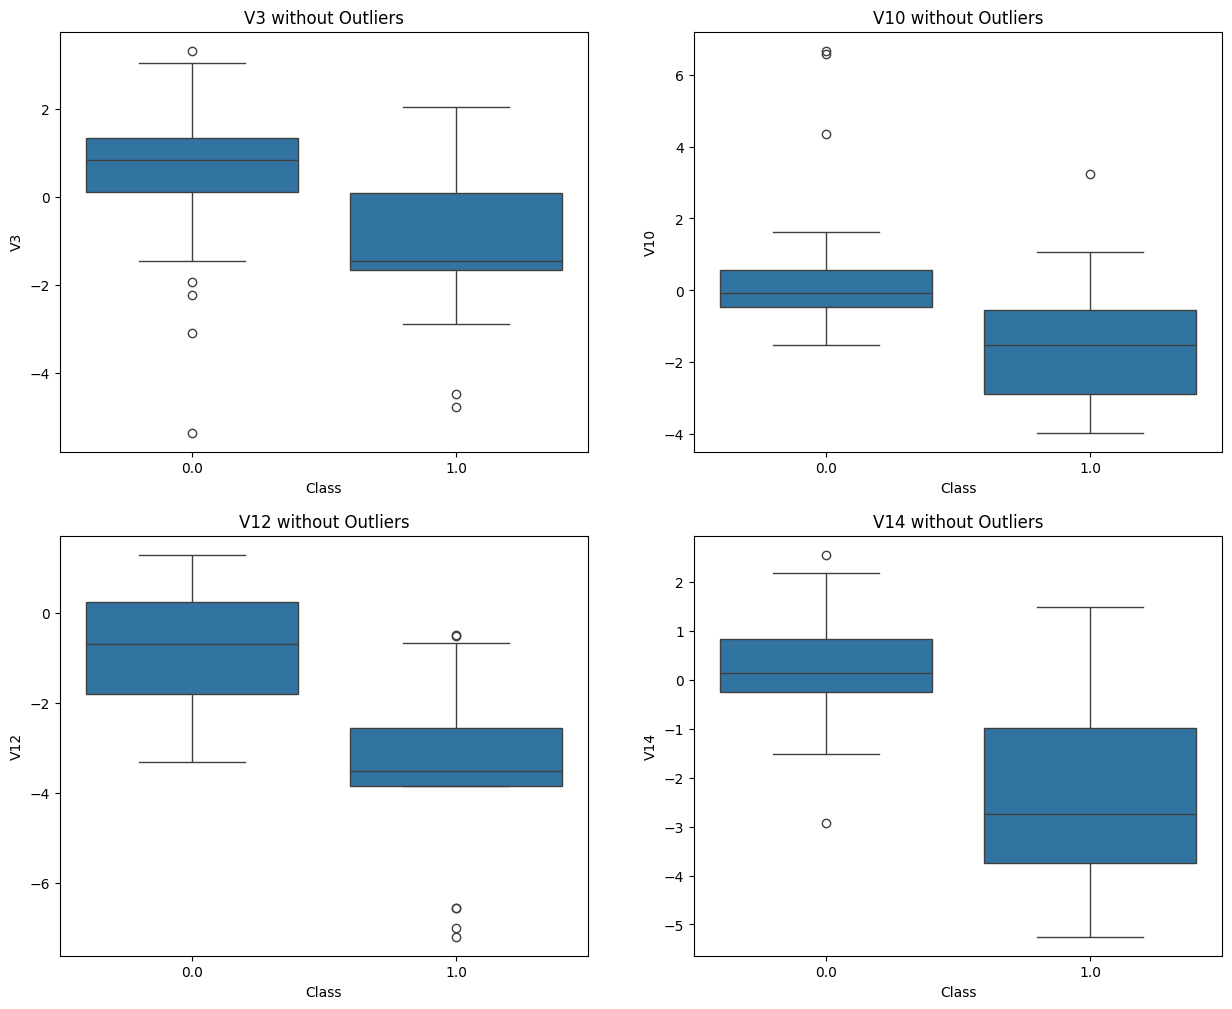

In [30]:
fig, ax = plt.subplots(2,2,figsize=(15,12))

sns.boxplot(x="Class", y="V3",data=df_u_res,ax=ax[0][0])
ax[0][0].set_title("V3 without Outliers")

sns.boxplot(x="Class",y="V10",data=df_u_res,ax=ax[0][1])
ax[0][1].set_title("V10 without Outliers")

sns.boxplot(x="Class",y='V12',data=df_u_res,ax=ax[1][0])
ax[1][0].set_title("V12 without Outliers")

sns.boxplot(x="Class",y="V14",data=df_u_res,ax=ax[1][1])
ax[1][1].set_title("V14 without Outliers")


In [31]:
X= df_u_res.drop('Class',axis=1)
y=df_u_res['Class']

# **Model**

## **Feature Selection**

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
y_test.shape

(21,)

## **Model_1: LogisticRegression**

In [36]:
model1= LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [37]:
prediction1 = model1.predict(X_test)

In [38]:
model1_accuracy = accuracy_score(y_test,prediction1)
print(f"Logistic Regression Model Accuracy : {model1_accuracy*100:.2f}" )


Logistic Regression Model Accuracy : 85.71


## **Model_2: RandomForestClassifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier


model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
prediction2=model2.predict(X_test)

In [42]:
model2_accuracy = accuracy_score(y_test,prediction2)
print(f"Random Forest Model Accuracy: {model2_accuracy*100:.2f}")

Random Forest Model Accuracy: 90.48


## **Model 3: SVC**

In [44]:
from sklearn.svm import SVC

model3= SVC()
model3.fit(X_train,y_train)

SVC()

In [45]:
prediction3 = model3.predict(X_test)

In [46]:
model3_accuracy = accuracy_score(y_test,prediction3)
print(f"Support Vector Machine Model Accuracy : {model3_accuracy*100:.2f}")

Support Vector Machine Model Accuracy : 80.95


## **Model 4: DecisionTreeClassifier**

In [48]:
from sklearn.tree import DecisionTreeClassifier

model4= DecisionTreeClassifier()
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
prediction4 = model4.predict(X_test)

In [50]:
model4_accuracy = accuracy_score(y_test,prediction4)
print(f"Decision Tree Classifier Model Accuracy: {model4_accuracy*100:.2f} ")

Decision Tree Classifier Model Accuracy: 85.71 


## **OverSampling**

In [52]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.006534,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.122827,0.0
1,-1.006534,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.264338,0.0
2,-1.006489,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.844029,0.0
3,-1.006489,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.698457,0.0
4,-1.006445,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.829082,0.0


##  **Data preprocessing**

In [53]:
count_0= 0
count_1=0
for i in df['Class']:
  if i==0:
    count_0+=1
  else:
    count_1+=1
print(count_0,count_1)

25750 88


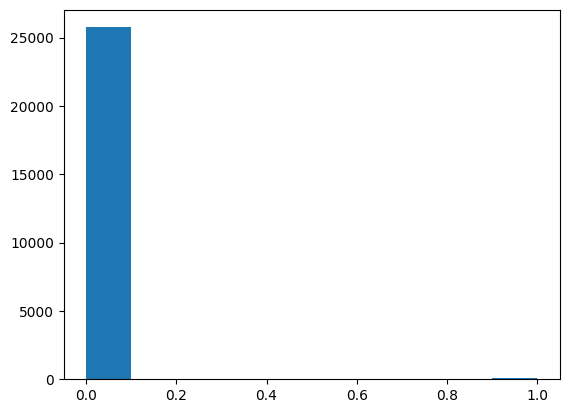

In [54]:
plt.hist(df['Class'])
plt.show()

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
X1= df.drop("Class",axis=1)
y1= df['Class']

In [57]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  float64
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [58]:
X1.fillna(0,inplace=True)

In [59]:
smote = SMOTE(random_state=42)
X_o_res, y_o_res = smote.fit_resample(X1, y1)

In [60]:
print("Original dataset class distribution:")
print(y.value_counts())

print("\nOver Resampled dataset class distribution:")
print(y_o_res.value_counts())

Original dataset class distribution:
Class
0.0    88
1.0    17
Name: count, dtype: int64

Over Resampled dataset class distribution:
Class
0.0    25750
1.0    25750
Name: count, dtype: int64


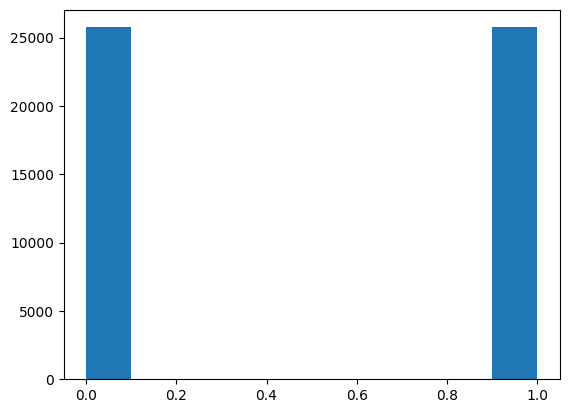

In [61]:
plt.hist(y_o_res)
plt.show()

In [63]:
df_o_res = pd.DataFrame(X_o_res, columns=X1.columns)
df_o_res["Class"] = y_o_res

## **correlation**

In [64]:

org_correl = df.corr()

over_correl = df_o_res.corr()

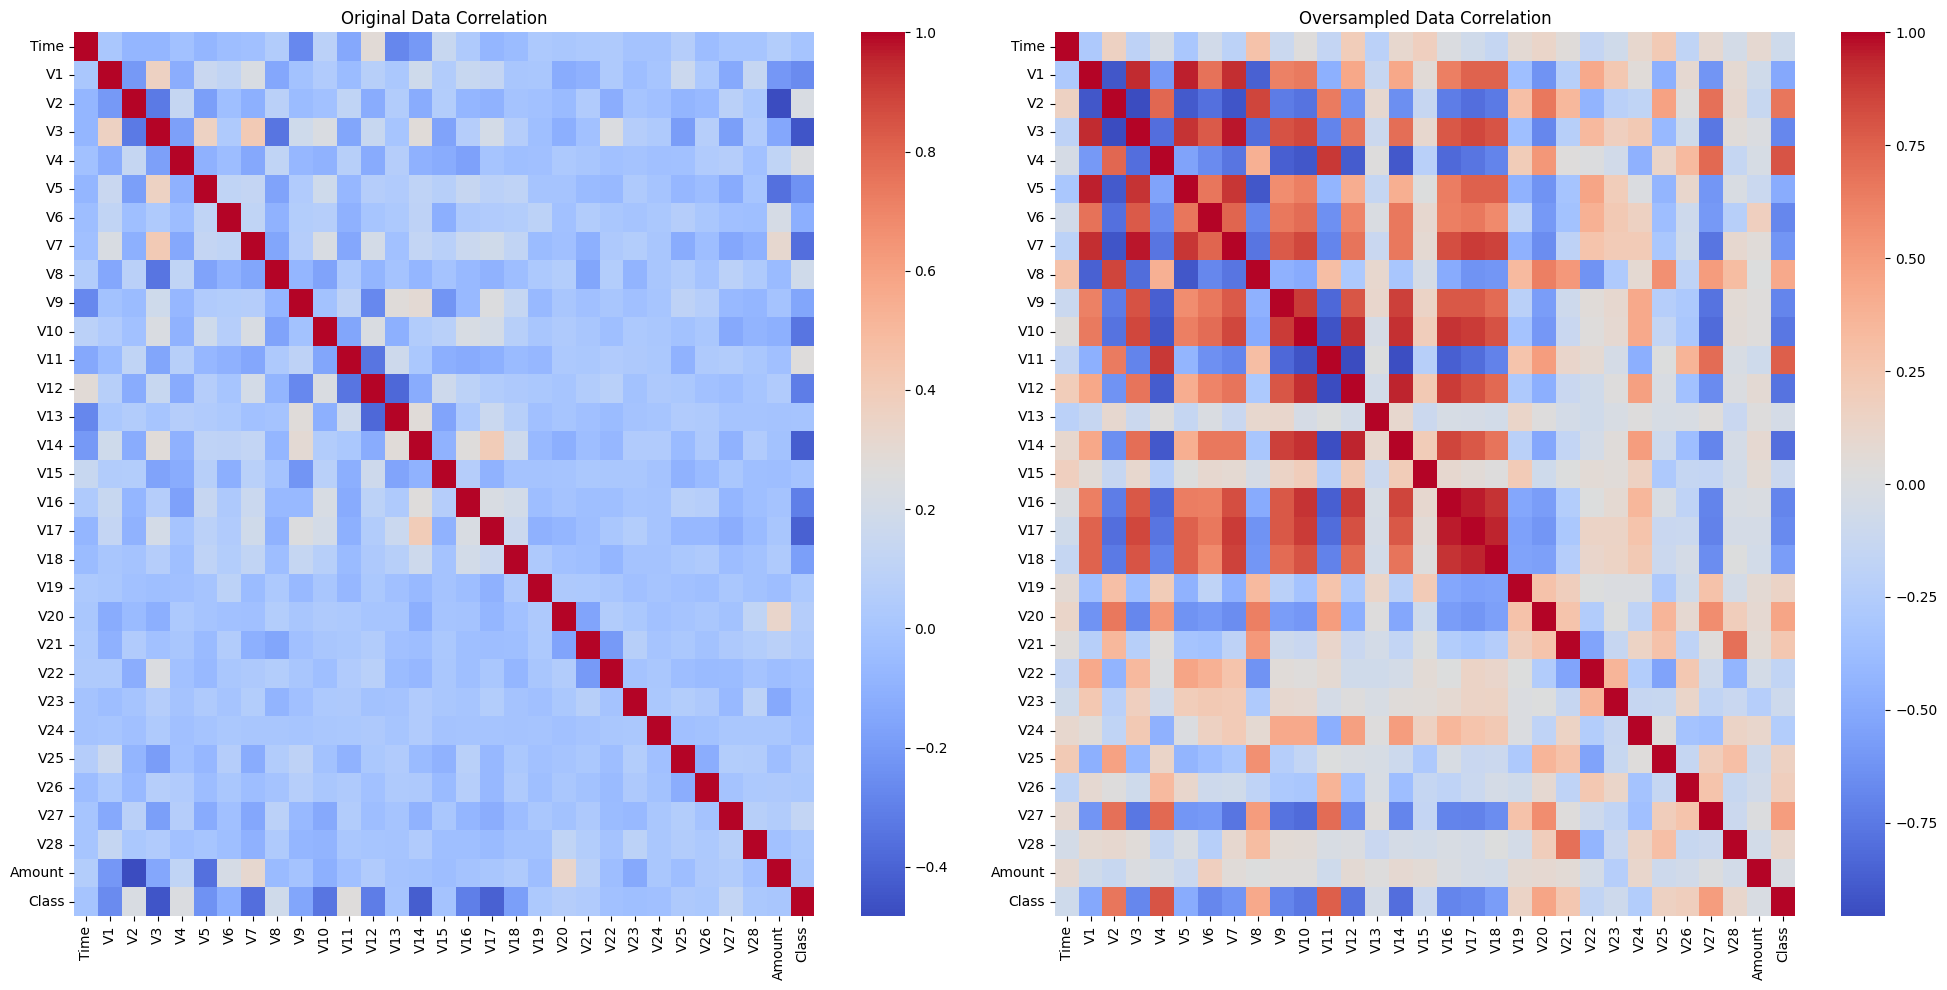

In [66]:


# Assuming org_correl and under_correl are your correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap for original correlation matrix
sns.heatmap(org_correl, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Original Data Correlation')

# Heatmap for undersampled correlation matrix
sns.heatmap(over_correl, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Oversampled Data Correlation')

plt.tight_layout()
plt.show()


## **Remove Outlier**

In [68]:
## Variable V3:
V3_Q1 = df_o_res['V3'].quantile(0.25)
V3_Q3 = df_o_res['V3'].quantile(0.75)
V3_IQR = V3_Q3 - V3_Q1
V3_lower_bound = V3_Q1 - 1.5 * V3_IQR
V3_upper_bound = V3_Q3 + 1.5 * V3_IQR
df_o_res = df_o_res[(df_o_res['V3'] >= V3_lower_bound) & (df_o_res['V3'] <= V3_upper_bound)]


## Variable V6:
V6_Q1 = df_o_res['V6'].quantile(0.25)
V6_Q3 = df_o_res['V6'].quantile(0.75)
V6_IQR = V6_Q3 - V6_Q1
V6_lower_bound = V6_Q1 - 1.5 * V6_IQR
V6_upper_bound = V6_Q3 + 1.5 * V6_IQR
df_o_res = df_o_res[(df_o_res['V6'] >= V6_lower_bound) & (df_o_res['V6'] <= V6_upper_bound)]



## Variable V10
V10_Q1 = df_o_res["V10"].quantile(0.25)
V10_Q3 = df_o_res['V10'].quantile(0.75)
V10_IQR = V10_Q3 - V10_Q1
V10_lower_bound = V10_Q1 - 1.5 * V10_IQR
V10_upper_bound = V10_Q3 + 1.5 * V10_IQR
df_o_res = df_o_res[(df_o_res['V10'] >= V10_lower_bound) & (df_o_res['V10'] <= V10_upper_bound)]


## Variable V12
V12_Q1 = df_o_res['V12'].quantile(0.25)
V12_Q3 = df_o_res['V12'].quantile(0.75)
V12_IQR = V12_Q3 - V12_Q1
V12_lower_bound = V12_Q1 - 1.5 * V12_IQR
V12_upper_bound = V12_Q3 + 1.5 * V12_IQR
df_o_res = df_o_res[(df_o_res['V12'] >= V12_lower_bound) & (df_o_res['V12'] <= V12_upper_bound)]


## Variable V14
V14_Q1 = df_o_res["V14"].quantile(0.25)
V14_Q3 = df_o_res['V14'].quantile(0.75)
V14_IQR = V14_Q3 - V14_Q1
V14_lower_bound = V14_Q1 - 1.5 * V14_IQR
V14_upper_bound = V14_Q3 + 1.5 * V14_IQR
df_o_res = df_o_res[(df_o_res['V14'] >= V14_lower_bound) & (df_o_res['V14'] <= V14_upper_bound)]


## Variable V16:
V16_Q1 = df_o_res['V16'].quantile(0.25)
V16_Q3 = df_o_res['V16'].quantile(0.75)
V16_IQR = V16_Q3 - V16_Q1
V16_lower_bound = V16_Q1 - 1.5 * V16_IQR
V16_upper_bound = V16_Q3 + 1.5 * V16_IQR
df_o_res = df_o_res[(df_o_res['V16'] >= V16_lower_bound) & (df_o_res['V16'] <= V16_upper_bound)]


In [70]:
df_o_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.006534,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.122827,0.0
1,-1.006534,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.264338,0.0
2,-1.006489,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.844029,0.0
3,-1.006489,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.698457,0.0
4,-1.006445,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.829082,0.0


In [81]:
X1= df_o_res.drop('Class',axis=1)
y1=df_o_res['Class']


24030 12031


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [80]:
prediction1 = model1.predict(X_test)
model1_accuracy = accuracy_score(y_test,prediction1)
print(f"Logistic Regression Model Accuracy : {model1_accuracy*100:.2f}" )

Logistic Regression Model Accuracy : 99.79
